 ## Predicting House Sale Prices

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

In [14]:
data=pd.read_csv('AmesHousing.tsv', '\t')

In [4]:
target='SalePrice'

In [5]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [38]:
def transform_features(df):
    
    return df

In [39]:
def select_features(df):
    return df[['Gr Liv Area','SalePrice']]

In [40]:
def train_and_test(df):
    train=df[:1460]
    test=df[1460:]
    
    numeric_train=train.select_dtypes(include=['float','integer'])
    numeric_test=test.select_dtypes(include=['float','integer'])
    
    features=numeric_train.columns.drop(target)
    
    lr=linear_model.LinearRegression()
    
    lr.fit(numeric_train[features],train[target])
    
    predictions = lr.predict(numeric_test[features])
    
    mse=mean_squared_error(predictions,numeric_test[target])
    rmse=np.sqrt(mse)
    
    return rmse

In [41]:
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
rmse = train_and_test(filtered_data)

rmse

57088.25161263909

## Feature Engineering

In [42]:
data.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [43]:
data.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type 

In [12]:
df_null=data.isnull().sum()
df_null

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

### Initial cleaning of missing values for all coulumns

In [44]:
# Drop columns that contains over 5% of missing values
drop_missing_cols=df_null[(df_null>len(data)/20)].sort_values()

drop_missing_cols

Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

In [45]:
data = data.drop(drop_missing_cols.index, axis=1)

### Investigate missing values in non-numeric columns

In [46]:
# Show numbers of missing values in each object type column
text_missing=data.select_dtypes(include=('object')).isnull().sum().sort_values(ascending=False)

text_missing

Bsmt Exposure     83
BsmtFin Type 2    81
BsmtFin Type 1    80
Bsmt Qual         80
Bsmt Cond         80
Mas Vnr Type      23
Electrical         1
Utilities          0
Lot Config         0
Land Slope         0
Roof Matl          0
Land Contour       0
Lot Shape          0
Street             0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Roof Style         0
Sale Condition     0
Exterior 1st       0
Exterior 2nd       0
Sale Type          0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
Kitchen Qual       0
Functional         0
Paved Drive        0
MS Zoning          0
dtype: int64

In [47]:
# Drop columns that have missing values

cols_to_drop=text_missing[(text_missing>0)]
cols_to_drop

Bsmt Exposure     83
BsmtFin Type 2    81
BsmtFin Type 1    80
Bsmt Qual         80
Bsmt Cond         80
Mas Vnr Type      23
Electrical         1
dtype: int64

In [48]:
data=data.drop(cols_to_drop.index,axis=1)

data.select_dtypes(include=('object'))

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Exter Cond,Foundation,Heating,Heating QC,Central Air,Kitchen Qual,Functional,Paved Drive,Sale Type,Sale Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,Fa,Y,TA,Typ,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,TA,CBlock,GasA,TA,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,TA,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,TA,CBlock,GasA,Ex,Y,Ex,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Gd,Y,TA,Typ,Y,WD,Normal
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
7,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
8,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
9,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,PConc,GasA,Gd,Y,Gd,Typ,Y,WD,Normal


### Investigate missing values in numeric columns

In [49]:
num_missing=data.select_dtypes(include=('float','integer')).isnull().sum().sort_values(ascending=False)

num_missing

Mas Vnr Area       23
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Cars         1
BsmtFin SF 1        1
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 2        1
Garage Area         1
PID                 0
Gr Liv Area         0
Lot Area            0
Year Remod/Add      0
Year Built          0
Overall Cond        0
Overall Qual        0
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
MS SubClass         0
SalePrice           0
Yr Sold             0
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
Mo Sold             0
Order               0
dtype: int64

In [50]:
# Use the most common value (mode) to replace the missing values in each column
fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)]
replacement_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
replacement_dict

{'1st Flr SF': 864.0,
 '2nd Flr SF': 0.0,
 '3Ssn Porch': 0.0,
 'Bedroom AbvGr': 3.0,
 'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Enclosed Porch': 0.0,
 'Fireplaces': 0.0,
 'Full Bath': 2.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Gr Liv Area': 864.0,
 'Half Bath': 0.0,
 'Kitchen AbvGr': 1.0,
 'Lot Area': 9600.0,
 'Low Qual Fin SF': 0.0,
 'MS SubClass': 20.0,
 'Mas Vnr Area': 0.0,
 'Misc Val': 0.0,
 'Mo Sold': 6.0,
 'Open Porch SF': 0.0,
 'Order': 1.0,
 'Overall Cond': 5.0,
 'Overall Qual': 5.0,
 'PID': 526301100.0,
 'Pool Area': 0.0,
 'SalePrice': 135000.0,
 'Screen Porch': 0.0,
 'TotRms AbvGrd': 6.0,
 'Total Bsmt SF': 0.0,
 'Wood Deck SF': 0.0,
 'Year Built': 2005.0,
 'Year Remod/Add': 1950.0,
 'Yr Sold': 2007.0}

In [51]:
# fill up the missing values using the dictionary created

data=data.fillna(replacement_dict)

In [52]:
check=data.isnull().sum().sort_values(ascending=False)
check

SalePrice          0
Sale Condition     0
BsmtFin SF 2       0
BsmtFin SF 1       0
Foundation         0
Exter Cond         0
Exter Qual         0
Mas Vnr Area       0
Exterior 2nd       0
Exterior 1st       0
Roof Matl          0
Roof Style         0
Year Remod/Add     0
Year Built         0
Overall Cond       0
Overall Qual       0
House Style        0
Bldg Type          0
Condition 2        0
Condition 1        0
Neighborhood       0
Land Slope         0
Lot Config         0
Utilities          0
Land Contour       0
Lot Shape          0
Street             0
Lot Area           0
MS Zoning          0
MS SubClass        0
                  ..
Fireplaces         0
Sale Type          0
Yr Sold            0
Mo Sold            0
Misc Val           0
Pool Area          0
Screen Porch       0
3Ssn Porch         0
Enclosed Porch     0
Open Porch SF      0
Wood Deck SF       0
Paved Drive        0
Garage Area        0
Garage Cars        0
Functional         0
Heating QC         0
TotRms AbvGrd

### Other adjustments to feature columns

In [72]:
# Identify meaningful measures using existing columns
years_sold = data['Yr Sold'] - data['Year Built']
years_sold[years_sold < 0]

years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [55]:
# Create new columns for the new measures
data['Years Before Sale'] = years_sold
data['Years Since Remod'] = years_since_remod

# Drop rows with negative values 
data = data.drop([1702, 2180, 2181], axis=0)

# Drop original year columns
data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)

In [57]:
# Drop columns that aren't useful for the purpose of the project
data = data.drop(["PID", "Order"], axis=1)

# Drop columns that leak info about the final sale (our y in the analysis)
data = data.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

#### update the transform_features function accordingly.

In [17]:
def transform_features(df):
    data=df.copy()
    df_null=data.isnull().sum()
    # initial all columns cleaning
    drop_missing_cols=df_null[(df_null>len(data)/20)].sort_values()
    data = data.drop(drop_missing_cols.index, axis=1)
    
    # categorical columns cleaning
    text_missing=data.select_dtypes(include=('object')).isnull().sum()
    cols_to_drop=text_missing[(text_missing>0)]
    data=data.drop(cols_to_drop.index,axis=1)
    
    # numeric columns cleaning
    num_missing=data.select_dtypes(include=('float','integer')).isnull().sum()
    
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)]
    replacement_dict = data[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    data=data.fillna(replacement_dict)
    
    #other adjustments
    years_sold = data['Yr Sold'] - data['Year Built']
    years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
    
    data['Years Before Sale'] = years_sold
    data['Years Since Remod'] = years_since_remod

    data = data.drop([1702, 2180, 2181], axis=0)
    data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)
    
    data = data.drop(["PID", "Order"], axis=1)
    data = data.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

    return data

In [32]:
transformed_data= transform_features(data)

In [33]:
transformed_data.head()

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,210,62,0,0,0,0,0,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,140,0,0,0,120,0,0,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,393,36,0,0,0,0,12500,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,0,0,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,212,34,0,0,0,0,0,189900,13,12


### Feature selection

In [34]:
numerical_data = transformed_data.select_dtypes(include=['int', 'float'])
numerical_data.head(5)

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,...,210,62,0,0,0,0,0,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,...,140,0,0,0,120,0,0,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,...,393,36,0,0,0,0,12500,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,...,0,0,0,0,0,0,0,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,...,212,34,0,0,0,0,0,189900,13,12


In [35]:
# calculate correlation matrix

abs_corr_coeffs = numerical_data.corr()['SalePrice'].abs().sort_values()
abs_corr_coeffs

BsmtFin SF 2         0.006127
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: Sale

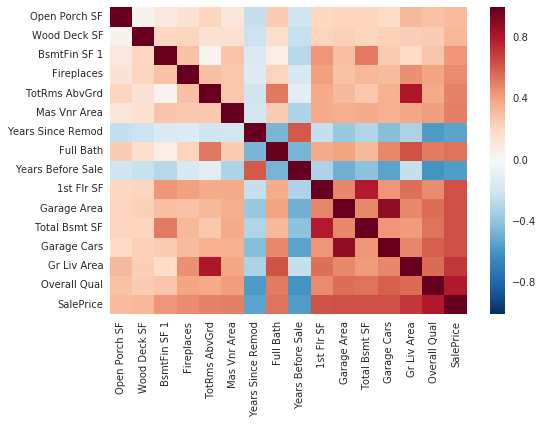

In [36]:
# populate heatmap
strong_corrs=abs_corr_coeffs[abs_corr_coeffs>0.3]
corrmap=numerical_data[strong_corrs.index].corr()
sns.heatmap(corrmap)

In [37]:
abs_corr_coeffs[abs_corr_coeffs > 0.4]

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [38]:
# Drop columns with less than 0.4 correlation with SalePrice
transformed_data = transformed_data.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)

In [39]:
# review and identify categorical columns
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [41]:
# check which ones are still left in the transformed dataframe.
transform_cat_cols = []
for col in nominal_features:
    if col in transformed_data.columns:
        transform_cat_cols.append(col)
        
unique_cat_counts = transformed_data[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()

# arbitrary cutoff value: 15
drop_nonuniq_cols = unique_cat_counts[unique_cat_counts > 15].index
transformed_data = transformed_data.drop(drop_nonuniq_cols, axis=1)

In [46]:
# select & convert the remaining text columns to categorical
text_cols = transformed_data.select_dtypes(include=['object'])

for col in text_cols:
    transformed_data[col] = transformed_data[col].astype('category')
    
# create dummy columns and add back to the dataframe
dum = pd.get_dummies(transformed_data.select_dtypes(include=['category']))

transformed_data = pd.concat([
    transformed_data,dum 
], axis=1).drop(text_cols,axis=1)

#### Update the function select_features() accordingly.

In [ ]:
def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return df